<a href="https://colab.research.google.com/github/tahaydogukan/fashion-mnist-cnn-cv-prediction/blob/main/fashion_mnist_train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
labels = [
    "T-shirt/top",   # 0
    "Trouser",       # 1
    "Pullover",      # 2
    "Dress",         # 3
    "Coat",          # 4
    "Sandal",        # 5
    "Shirt",         # 6
    "Sneaker",       # 7
    "Bag",           # 8
    "Ankle boot"     # 9
]

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


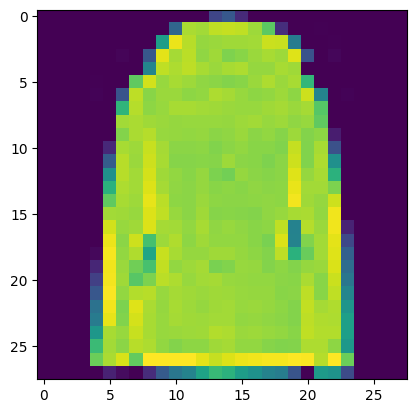

In [ ]:
plt.imshow(x_train[2000])
print(y_train[2000])

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=( 28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2,  callbacks=[early_stop])


Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7676 - loss: 0.6477 - val_accuracy: 0.8589 - val_loss: 0.3930
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8597 - loss: 0.3770 - val_accuracy: 0.8673 - val_loss: 0.3750
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8794 - loss: 0.3269 - val_accuracy: 0.8793 - val_loss: 0.3424
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8876 - loss: 0.2990 - val_accuracy: 0.8839 - val_loss: 0.3360
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8941 - loss: 0.2829 - val_accuracy: 0.8841 - val_loss: 0.3167
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8978 - loss: 0.2665 - val_accuracy: 0.8893 - val_loss: 0.3125
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9042 - loss: 0.2518 - val_accuracy: 0.8888 - val_loss: 0.3128
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9086 - loss: 0.2416 - val_accuracy: 0.

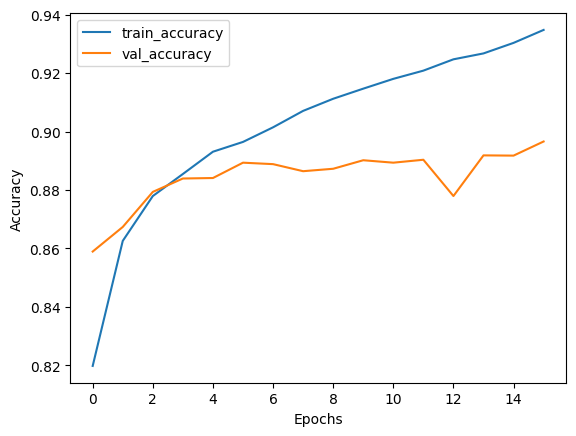

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

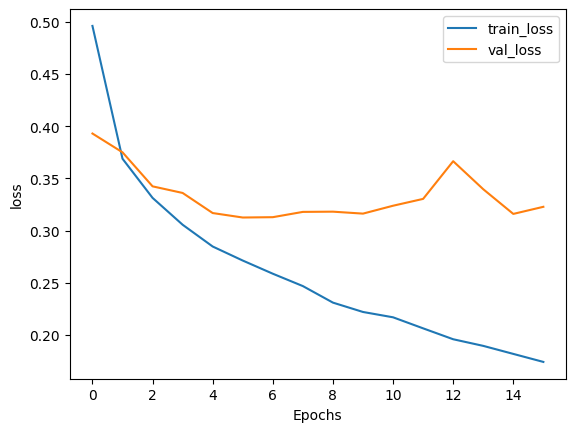

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8892 - loss: 0.3521
Test accuracy: 0.8892999887466431


Burası tahmin kısmı

In [ ]:
new_data = x_test[40]
new_label = y_test[40]

In [ ]:
new_label

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
new_data = np.expand_dims(new_data, axis=0)

In [ ]:
prediction = model.predict(new_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


In [ ]:
predicted_label = np.argmax(prediction)
predicted_label

np.int64(0)

Text(0.5, 1.0, 'Gerçek Değer: 6, Tahmin: T-shirt/top')

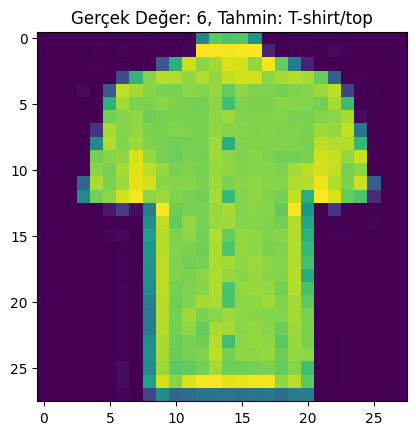

In [ ]:
plt.imshow(x_test[40])
plt.title(f'Gerçek Değer: {np.argmax(new_label)}, Tahmin: {labels[predicted_label]}')

CNN

In [ ]:
from tensorflow.keras.datasets import fashion_mnist


In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7508 - loss: 0.6827 - val_accuracy: 0.8621 - val_loss: 0.3740
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8742 - loss: 0.3454 - val_accuracy: 0.8879 - val_loss: 0.3109
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8915 - loss: 0.2938 - val_accuracy: 0.8940 - val_loss: 0.2819
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9002 - loss: 0.2651 - val_accuracy: 0.8983 - val_loss: 0.2783
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9123 - loss: 0.2355 - val_accuracy: 0.9013 - val_loss: 0.2637
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9184 - loss: 0.2189 - val_accuracy: 0.9056 - val_loss: 0.2581
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9247 - loss: 0.1970 - val_accuracy: 0.9059 - val_loss: 0.2617
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9316 - loss: 0.1825 

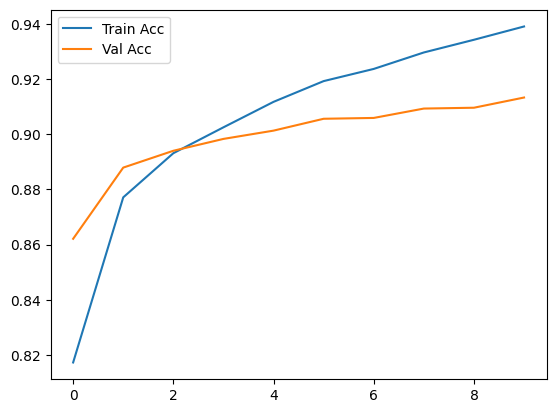

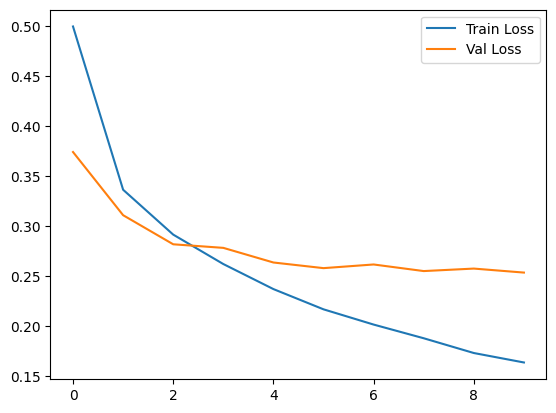

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


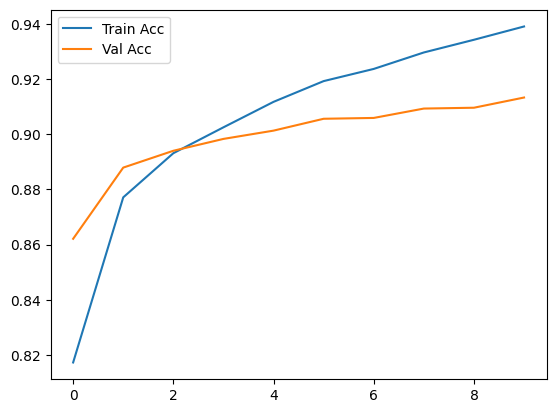

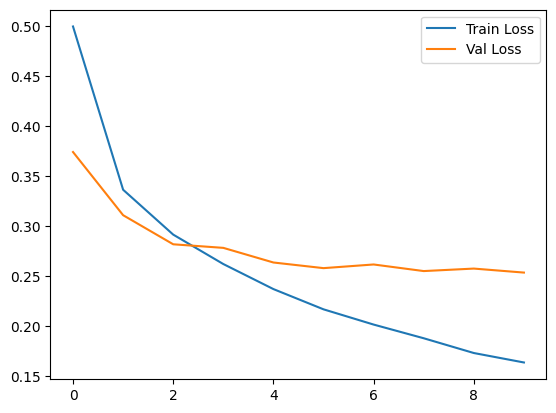

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


In [ ]:
import cv2
import numpy as np
path = "/content/WIN_20251202_13_03_36_Pro.jpg"

img = cv2.imread(path)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray_resized = (cv2.resize(img_gray,(28,28)) /255).reshape(1,28,28,1)

preds = model.predict(img_gray_resized)
pred_class = np.argmax(preds)
confidence = np.max(preds)

print("Tahmin sınıf indexi:", pred_class)
print("Tahmin sınıf ismi  :", labels[pred_class])
print(f"Güven: %{confidence*100:.1f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Tahmin sınıf indexi: 0
Tahmin sınıf ismi  : T-shirt/top
Güven: %28.6


In [ ]:
model.save('my_model.keras')